In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
sns.set()

In [46]:
df_downloads_desc = pd.read_json("../data/download_descriptions.json")
bins = np.linspace(0, 1, num=20)

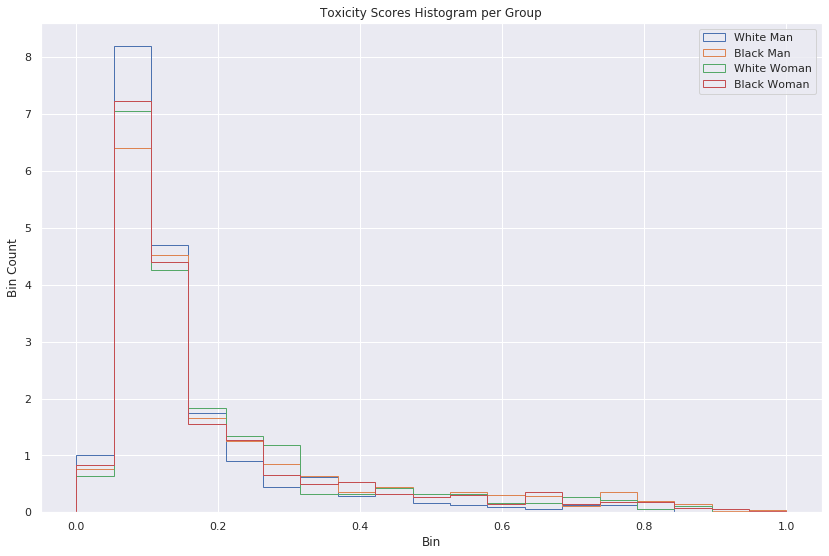

In [79]:
plt.subplots(figsize=(14,9))

for group in df_downloads_desc["group"].unique():
    group_ids = df_downloads_desc[df_downloads_desc.group == group].index
    
    df = pd.concat([pd.read_csv(f"../data/03_scored/scored-{i}.csv") for i in group_ids])
    plt.hist(df.score, bins=bins, label=group, density=True, histtype="step")

plt.title("Toxicity Scores Histogram per Group")
plt.xlabel("Bin")
plt.ylabel("Bin Count")
plt.legend()

plt.show()

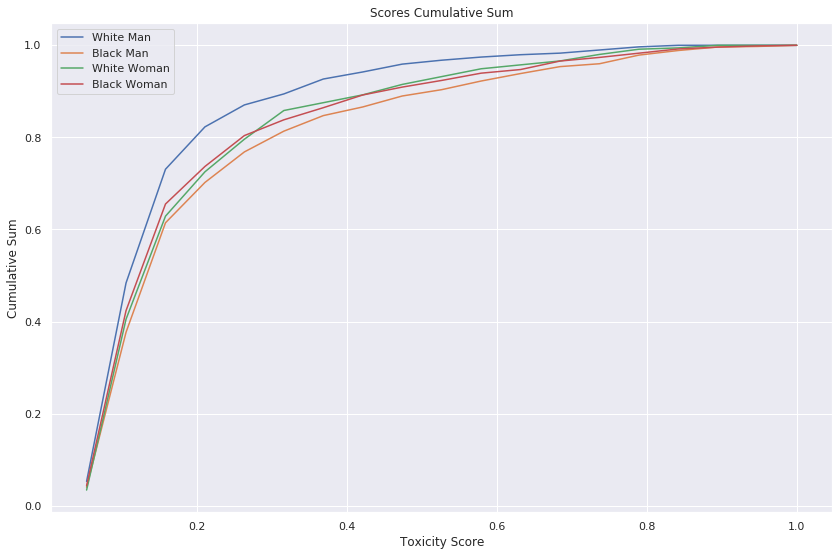

In [72]:
plt.subplots(figsize=(14,9))

for group in df_downloads_desc["group"].unique():
    group_ids = df_downloads_desc[df_downloads_desc.group == group].index
    
    df = pd.concat([pd.read_csv(f"../data/03_scored/scored-{i}.csv") for i in group_ids])
    y, x = np.histogram(df.score, bins=bins)
    y = y/y.sum()
    
    plt.plot(x[1:], y.cumsum(), label=group)

plt.title("Scores Cumulative Sum")
plt.xlabel("Toxicity Score")
plt.ylabel("Cumulative Sum")
plt.legend()

plt.show()

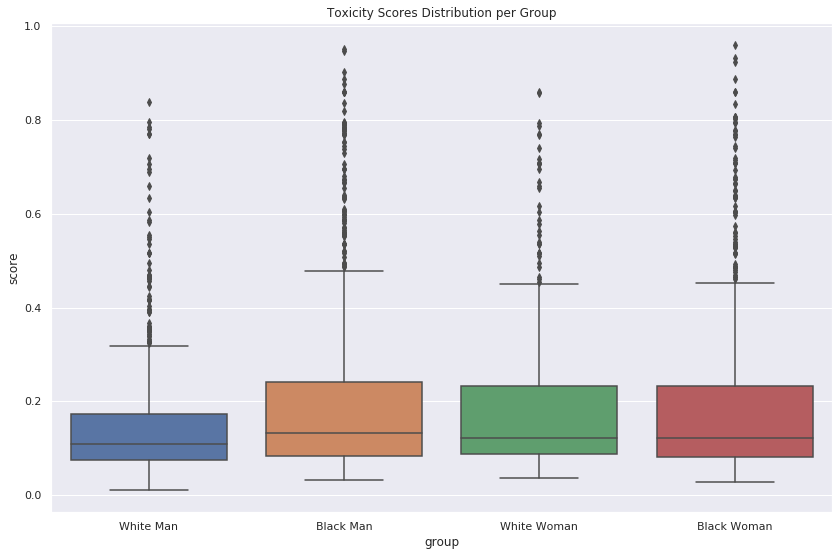

In [74]:
plt.subplots(figsize=(14,9))

dfs = []
for group in df_downloads_desc["group"].unique():
    group_ids = df_downloads_desc[df_downloads_desc.group == group].index
    
    df_group = pd.concat([pd.read_csv(f"../data/03_scored/scored-{i}.csv") for i in group_ids])
    df_group["group"] = group
    
    dfs.append(df_group)

df = pd.concat(dfs)
del dfs, df_group

sns.boxplot(data=df, x="group", y="score")
plt.title("Toxicity Scores Distribution per Group")
plt.show()